In [3]:
import json
with open("submit.json","r") as f:
    submit = json.load(f)

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os
src = "/home/ubuntu/datasets/signate/fish/test_images/"
test_files = os.listdir(src)

[1582, 508, 2278, 794]


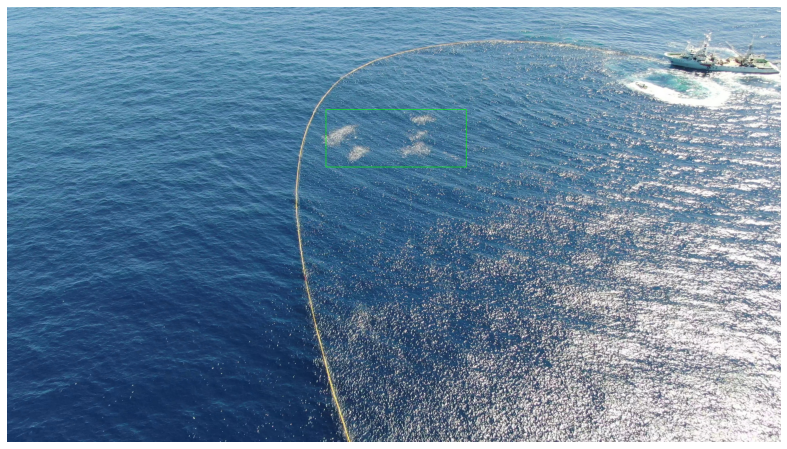

In [20]:
def vis(idx):
    img_name = test_files[idx]
    image = cv2.imread(f'{src}/{img_name}', cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
    image /= 255.0
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))

    result = submit[img_name]
    classes = ["Jumper School","Breezer School"]
    for c in classes:
        boxes = result[c]
        for box in boxes:
            print(box)
            cv2.rectangle(image, (box[0], box[1]), (box[2],  box[3]), (0, 1, 0), 2)
    ax.set_axis_off()
    ax.imshow(image)
vis(0)

In [3]:
import os
annos = os.listdir("/home/ubuntu/datasets/signate/fish/train_annotations")
anno_path = "/home/ubuntu/datasets/signate/fish/train_annotations/"
import json
img_id = []
w = []


for anno in annos:
    n = 0
    with open(anno_path + anno) as f:
        l = json.load(f)["labels"]
        l_keys = l.keys()
        for k in l_keys:
            w.append(k)
            if k in ["Jumper School","Breezer School"]:
                n += len(l[k])
    if not n == 0:
        img_id.append(anno[:-5])

In [5]:
import pandas as pd
df = pd.DataFrame({"a":w})

In [6]:
df.a.value_counts()

Jumper School     2387
Breezer School    2277
Wake              1372
Ripple            1008
Smooth Surface     607
Cloud              401
Object              71
Bird                38
Each Fish           10
Dolphin              1
w                    1
Name: a, dtype: int64